# Emotion Detection

IMPORTING REQUIRED MODULES

In [7]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version: ", tf.__version__)

Tensorflow version:  2.13.0


EXPLORING DATASET

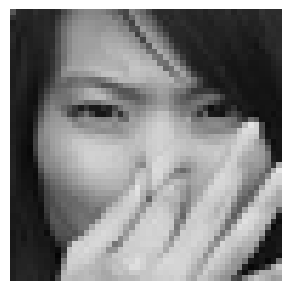

In [8]:
images = glob("train/**/**")
for i in range(1):
    image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')

PREPARING DATA FOR TRAINING

In [9]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/", 
                                                    target_size = (img_size,img_size), 
                                                    color_mode = "grayscale",
                                                    batch_size = batch_size,
                                                    class_mode = "categorical",
                                                    shuffle = True)

datagen_validation = ImageDataGenerator()
validation_generator = datagen_validation.flow_from_directory("test/", 
                                                    target_size = (img_size,img_size), 
                                                    color_mode = "grayscale",
                                                    batch_size = batch_size,
                                                    class_mode = "categorical",
                                                    shuffle = True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


DEFINING MODEL

In [10]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    
    return x

In [11]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x

In [12]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs, 32, (3,3))
    conv_2 = Convolution(conv_1, 64, (5,5))
    conv_3 = Convolution(conv_2, 128, (3,3))
    
    flatten = Flatten()(conv_3)
    dense_1 = Dense_f(flatten,256)
    
    output = Dense(7,activation = "softmax")(dense_1)
    model = Model(inputs = [inputs], outputs = [output])
    
    model.compile(loss = ['categorical_crossentropy'], optimizer = 'adam', metrics = ['accuracy'])
    
    return model

In [13]:
model = model_fer((48,48,1))
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0     

INITIALIZING THE MODEL

In [14]:
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.h5", monitor = "val_accuracy", save_weights_only = True, mode = "max", verbose = 1)
callbacks = [checkpoint]

TRAINING THE MODEL

In [15]:
history = model.fit(
    x = train_generator,
    steps_per_epoch = steps_per_epoch,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks = callbacks)

Epoch 1/15
448/448 [==============================] - ETA: 0s - loss: 1.6737 - accuracy: 0.3677
Epoch 1: saving model to model_weights.h5
448/448 [==============================] - 489s 1s/step - loss: 1.6737 - accuracy: 0.3677 - val_loss: 1.4282 - val_accuracy: 0.4466
Epoch 2/15
448/448 [==============================] - ETA: 0s - loss: 1.3751 - accuracy: 0.4731
Epoch 2: saving model to model_weights.h5
448/448 [==============================] - 159s 355ms/step - loss: 1.3751 - accuracy: 0.4731 - val_loss: 1.4082 - val_accuracy: 0.4506
Epoch 3/15
448/448 [==============================] - ETA: 0s - loss: 1.2685 - accuracy: 0.5180
Epoch 3: saving model to model_weights.h5
448/448 [==============================] - 135s 301ms/step - loss: 1.2685 - accuracy: 0.5180 - val_loss: 1.4262 - val_accuracy: 0.4581
Epoch 4/15
448/448 [==============================] - ETA: 0s - loss: 1.2030 - accuracy: 0.5448
Epoch 4: saving model to model_weights.h5
448/448 [==============================] - 140

MODEL EVALUATION

In [3]:
model.evaluate(validation_generator)

NameError: name 'model' is not defined

PLOTTING LOSS

In [2]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.subplots_adjust(top = 1.0, bottom = 0.0, right = 0.95, left = 0.0, hspace = 0.25, wspace = 0.35)

NameError: name 'plt' is not defined

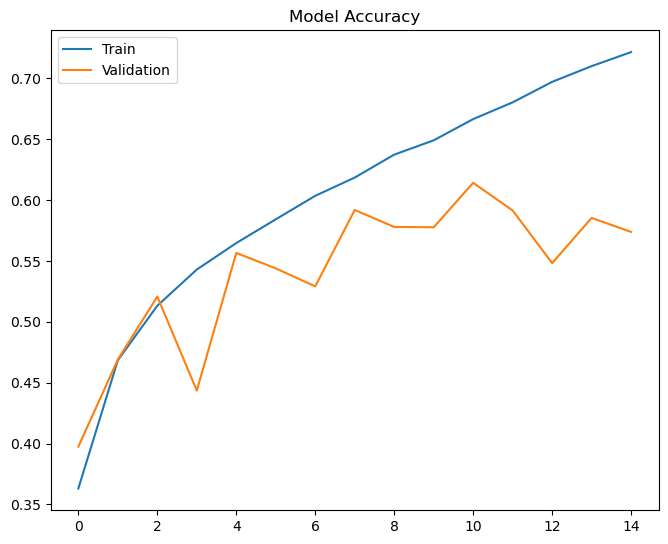

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.subplots_adjust(top = 1.0, bottom = 0.0, right = 0.95, left = 0.0, hspace = 0.25, wspace = 0.35)

SAVING MODEL

In [15]:
model_json = model.to_json()
with open("model_a.json", "w") as json_file:
    json_file.write(model_json)